In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_california_housing

In [4]:
housing = fetch_california_housing()

X = housing.data
Y = housing.target

data = pd.DataFrame(X, columns = housing.feature_names)
data["SalesPrice"] = Y

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalesPrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
data.to_csv("out.csv", index=False)
print("CSV file saved as out.csv")

CSV file saved as out.csv


In [5]:
print(data.shape)        

(20640, 9)


In [6]:
data.info()              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalesPrice  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
data.describe() 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalesPrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
data.isnull().sum()      

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
SalesPrice    0
dtype: int64

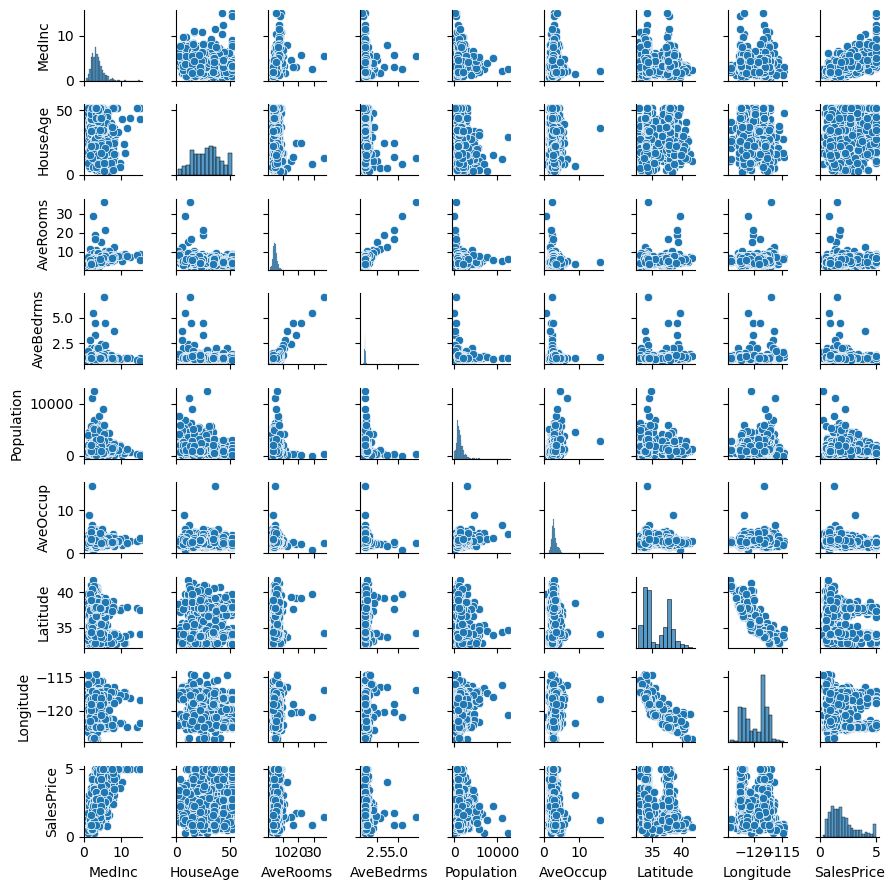

In [9]:
sns.pairplot(data.sample(1000), height=1.0)
plt.tight_layout()  
plt.show()

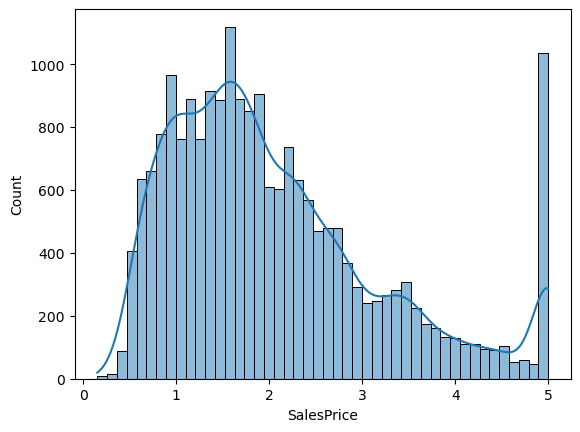

In [10]:
sns.histplot(data['SalesPrice'], kde=True)
plt.show()

In [11]:
print("Skewness: %f" % data['SalesPrice'].skew())
print("Kurtosis: %f" % data['SalesPrice'].kurt())

Skewness: 0.977763
Kurtosis: 0.327870


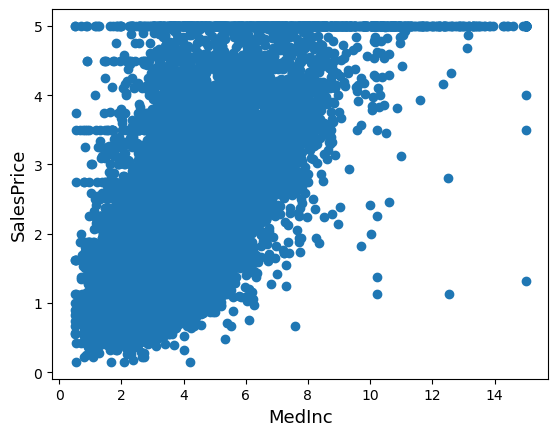

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = data['MedInc'], y = data['SalesPrice'])
plt.ylabel('SalesPrice', fontsize = 13)
plt.xlabel('MedInc', fontsize = 13)
plt.show()

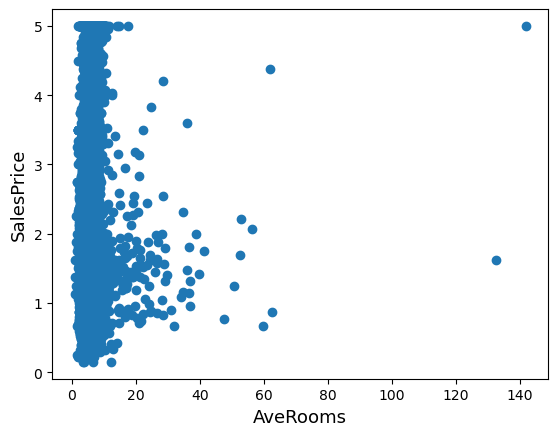

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = data['AveRooms'], y = data['SalesPrice'])
plt.ylabel('SalesPrice', fontsize = 13)
plt.xlabel('AveRooms', fontsize = 13)
plt.show()


 mu = 2.07 and sigma = 1.15 



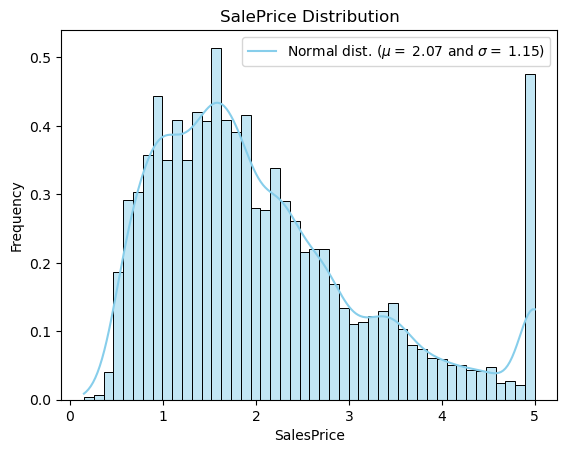

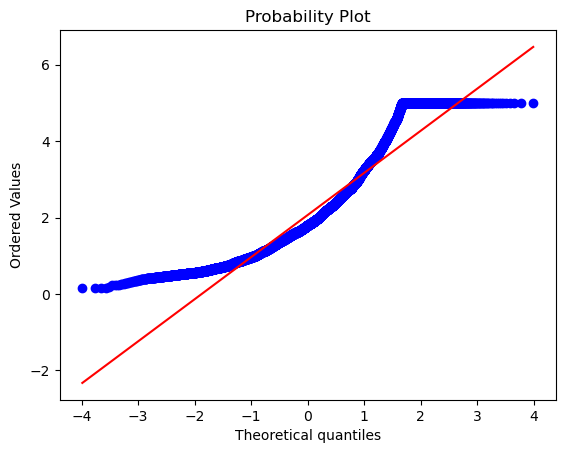

In [14]:
from scipy import stats
from scipy.stats import norm, skew
sns.histplot(data['SalesPrice'], kde=True, stat="density", color="skyblue")
(mu, sigma) = norm.fit(data['SalesPrice'])
print('\n mu = {:.2f} and sigma = {:.2f} \n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu = $ {:.2f} and $\sigma = $ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

fig = plt.figure()
res = stats.probplot(data['SalesPrice'], plot=plt)
plt.show()


 mu = 1.06 and sigma = 0.36 



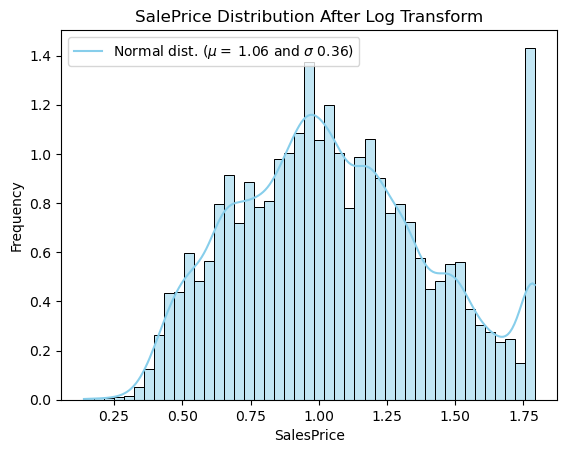

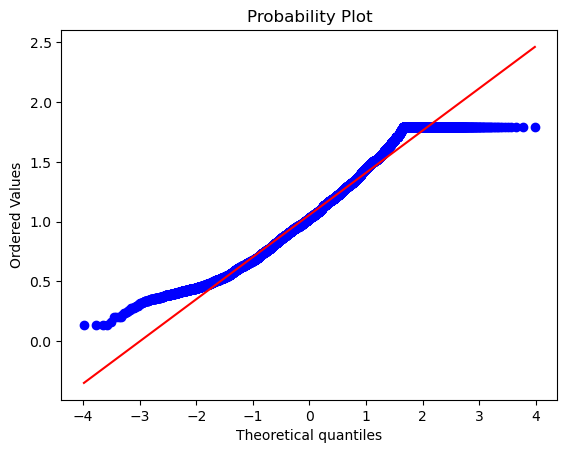

In [15]:
data['SalesPrice'] = np.log1p(data['SalesPrice'])
sns.histplot(data['SalesPrice'], kde=True, stat="density", color="skyblue")
(mu, sigma) = norm.fit(data['SalesPrice'])
print('\n mu = {:.2f} and sigma = {:.2f} \n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu = $ {:.2f} and $\sigma $ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution After Log Transform')

fig = plt.figure()
res = stats.probplot(data['SalesPrice'], plot=plt)
plt.show()

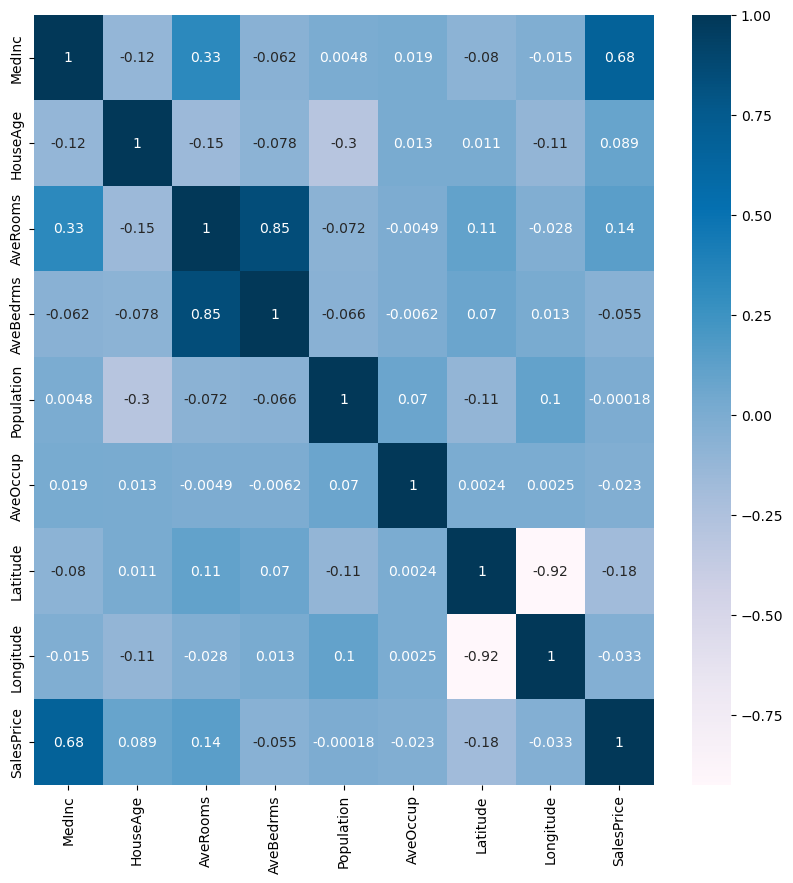

In [16]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [26]:
cor_target = abs(cor['SalesPrice'])
relevant_features = cor_target[cor_target > 0.2]
names = [index for index, value in relevant_features.items()]
names.remove('SalesPrice')
print(names)
print(len(names))

['MedInc']
1


In [27]:
from sklearn.model_selection import train_test_split
X = data.drop('SalesPrice', axis=1)
Y = data['SalesPrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [31]:
predictions = lr.predict(X_test)
print("Actual value of the house ", Y_test[0])
print("Predicted value of the house ", predictions[0])

Actual value of the house  1.7094642265012248
Predicted value of the house  0.6275833553422849


In [32]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
print(rmse)

0.22436602177852205
